In [7]:
# Library imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [8]:
def evaluate(t, y):
    NBodies = int(len(y)/6)
    solved_vector = np.zeros(y.size)
    
    for i in range(NBodies):
        ioffset = i*6
        
        for j in range(NBodies):
            joffset = j*6
            solved_vector[ioffset:ioffset+3] = y[ioffset+3:ioffset+6]
            
            if i != j:
                d = y[ioffset:ioffset+3] - y[joffset:joffset+3]
                r = np.sqrt(np.sum(d**2))
                a = d*G*masses[j]/(r**3)
                solved_vector[ioffset+3:ioffset+6] += a
    
    return solved_vector

In [9]:
def euler(t,dt,y,evaluate):
    k = dt * evaluate(t, y) 
    y_new = y + k
    
    return y_new

In [10]:
def run(T, dt, y0, masses, evaluate, t0 = 0):
    nsteps = int((T-t0)/dt)
    history = np.empty((nsteps+1, len(y0)))
    history[0, :] = y0
    
    t = t0
    for i in range(nsteps):
        history[i+1] = euler(t, dt, history[i,:], evaluate) 
        t += dt
    
    return history

In [11]:
# Variable declaration 1
G = -6.67*(10**-11)
t0 = 0
T = 6.221e6
dt = 3600  
y0 = np.array([3.84e8, 0, 0, 0, 1000, 0,
               0, 0, 0, 0, 0, 0])
masses = np.array([7.347e22, 5.97e24])

In [12]:
# Calculation
history = run(T, dt, y0, masses, evaluate)

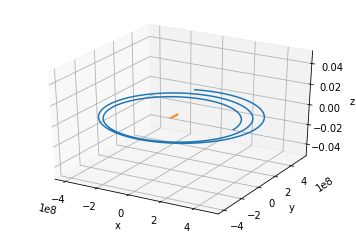

In [13]:
# Plot the results
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

ax.plot3D(history[:,0], history[:,1], history[:,2])
ax.plot3D(history[:,6], history[:,7], history[:,8])